<a href="https://colab.research.google.com/github/Anni1123/MachineLearning/blob/master/10_FCV_using_80_20_split_preprocessing_from_6_to_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 Fold Cross Validation with 80:20 split for the whole dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd "/content/drive/MyDrive/Mini Project Sem 6/Project Code "

/content/drive/.shortcut-targets-by-id/1YNJCt2SYewKHMnj3Gt-6KeBSZ2DvB6Dt/Mini Project Sem 6/Project Code 


In [5]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics
import librosa

In [ ]:
cycles=pd.read_csv('cycles.csv')

In [ ]:
cycles=cycles.iloc[:,[0,1,-1]]

In [ ]:
cycles=cycles.drop(['Patient Id'],axis=1)

In [ ]:
augmented=pd.read_csv("augumented_cycles.csv")
augmented

,filename,Label
0,138_1p3_Pr_mc_AKGC417L_cycle_4.npyaugmented_cr...,crackles
1,130_2b3_Lr_mc_AKGC417L_cycle_2.npyaugmented_cr...,crackles
2,176_1b3_Lr_mc_AKGC417L_cycle_3.npyaugmented_cr...,crackles
3,177_2b4_Al_mc_AKGC417L_cycle_3.npyaugmented_cr...,crackles
4,130_3b3_Ll_mc_AKGC417L_cycle_2.npyaugmented_cr...,crackles
...,...,...
3436,192_2b2_Ar_mc_LittC2SE_cycle_5.npyaugmented_wh...,wheezes
3437,192_2b2_Ar_mc_LittC2SE_cycle_5.npyaugmented_wh...,wheezes
3438,201_1b2_Ar_sc_Meditron_cycle_6.npyaugmented_wh...,wheezes
3439,201_1b2_Ar_sc_Meditron_cycle_6.npyaugmented_wh...,wheezes


In [ ]:
cycles.columns=["filename","Label"]

In [ ]:
mixed_cycles=pd.concat([cycles,augmented],ignore_index=True)

In [ ]:
mixed_cycles.to_csv("total_dataset.csv",index_label=False)

In [6]:
data=pd.read_csv('total_dataset.csv')
data.head()


,filename,Label
0,101_1b1_Al_sc_Meditron_cycle_0.npy,healthy
1,101_1b1_Al_sc_Meditron_cycle_1.npy,healthy
2,101_1b1_Al_sc_Meditron_cycle_2.npy,healthy
3,101_1b1_Al_sc_Meditron_cycle_3.npy,healthy
4,101_1b1_Al_sc_Meditron_cycle_4.npy,healthy


In [7]:
patient_id=[]
for i in data['filename']:
  split_filename=i.split('_')
  id=int(split_filename[0])
  patient_id.append(id)

In [8]:
data['Patient_ID']=patient_id

In [9]:
data.head()

,filename,Label,Patient_ID
0,101_1b1_Al_sc_Meditron_cycle_0.npy,healthy,101
1,101_1b1_Al_sc_Meditron_cycle_1.npy,healthy,101
2,101_1b1_Al_sc_Meditron_cycle_2.npy,healthy,101
3,101_1b1_Al_sc_Meditron_cycle_3.npy,healthy,101
4,101_1b1_Al_sc_Meditron_cycle_4.npy,healthy,101


# splitting training and testing data in 80:20 ratio

In [10]:
x_train,x_test,y_train,y_test = train_test_split(data,data.Label,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8271, 3), (2068, 3), (8271,), (2068,))

In [11]:
test_labels=list(x_test['Label'])
train_labels=list(x_train['Label'])

In [12]:
test_filenames=list(x_test['filename'])
test_filenames


['118_1b1_Pr_sc_Litt3200_cycle_3.npyaugmented_wheezes_ps',
 '151_2p2_Al_mc_AKGC417L_cycle_4.npy',
 '192_2b3_Ar_mc_LittC2SE_cycle_1.npyaugmented_wheezes_ni',
 '192_2b2_Al_mc_LittC2SE_cycle_1.npy',
 '156_5b3_Pr_mc_AKGC417L_cycle_2.npy',
 '174_1p2_Ll_mc_AKGC417L_cycle_1.npy',
 '152_1b1_Al_sc_Meditron_cycle_6.npy',
 '133_3p4_Tc_mc_AKGC417L_cycle_2.npy',
 '206_1b1_Pl_sc_Meditron_cycle_1.npy',
 '147_2b3_Ar_mc_AKGC417L_cycle_4.npy',
 '205_4b2_Lr_mc_AKGC417L_cycle_3.npy',
 '124_1b1_Lr_sc_Litt3200_cycle_0.npy',
 '131_1b1_Al_sc_Meditron_cycle_8.npy',
 '158_1p3_Al_mc_AKGC417L_cycle_0.npy',
 '151_2p2_Pl_mc_AKGC417L_cycle_1.npy',
 '158_1p4_Ar_mc_AKGC417L_cycle_6.npy',
 '193_1b2_Pl_mc_AKGC417L_cycle_5.npy',
 '154_4b4_Pl_mc_AKGC417L_cycle_7.npyaugmented_cracles_cs',
 '135_2b1_Tc_mc_LittC2SE_cycle_5.npy',
 '154_1b3_Ll_mc_AKGC417L_cycle_1.npy',
 '122_2b1_Tc_mc_LittC2SE_cycle_3.npyaugmented_wheezes_cs',
 '151_2p4_Ll_mc_AKGC417L_cycle_0.npyaugmented_both_ni',
 '193_1b2_Ar_mc_AKGC417L_cycle_9.npyaugmented

In [13]:
x_test

,filename,Label,Patient_ID
9888,118_1b1_Pr_sc_Litt3200_cycle_3.npyaugmented_wh...,wheezes,118
2502,151_2p2_Al_mc_AKGC417L_cycle_4.npy,crackles,151
9718,192_2b3_Ar_mc_LittC2SE_cycle_1.npyaugmented_wh...,wheezes,192
5122,192_2b2_Al_mc_LittC2SE_cycle_1.npy,both,192
2979,156_5b3_Pr_mc_AKGC417L_cycle_2.npy,both,156
...,...,...,...
4318,176_1b3_Ar_mc_AKGC417L_cycle_5.npy,crackles,176
8811,138_2p2_Ar_mc_AKGC417L_cycle_6.npyaugmented_bo...,both,138
7180,186_2b2_Lr_mc_AKGC417L_cycle_3.npyaugmented_cr...,crackles,186
6820,223_1b1_Pl_sc_Meditron_cycle_2.npy,healthy,223


In [14]:
train_array=[]
test_array=[]
i=0
j=0

In [15]:
for fn in test_filenames:
  print(j)
  if not fn.endswith(".npy"):
      fn=fn+".npy"
  array=np.load('/content/drive/MyDrive/Mini Project Sem 6/Project Code /CycleTimeSeriesData/'+fn)
  specs=librosa.feature.melspectrogram(y=array, sr=4000,hop_length=120, n_fft=240)
  # print(specs.shape)
  test_array.append(specs)
  j=j+1



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
padd_array_test=[]
for i in test_array:
  if (i.shape[1]>=90):
    arr=i[:,:90]
  else:
    padzeros=np.zeros((128,90-i.shape[1]))
    arr=np.hstack((i,padzeros))
  padd_array_test.append(arr)
  
  
padd_array_test=np.array(padd_array_test)
padd_array_test.shape
np.save('10CV_test_array.npy',padd_array_test,allow_pickle=True)

# Cross validation

Cross-validation is a method to estimate the skill of a method on unseen data. Like using a train-test split.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset. This, in turn, provides a population of performance measures.

# K-fold cross-validation

With K-fold cross-validation we split the training data into k equally sized sets (“folds”), take a single set as our validation set and combine the other set as our training set. We then cycle which fold we use as our validation set until we have trained and validated k times- each time with a unique train:validation split.

Link: https://stats.stackexchange.com/questions/52274/how-to-choose-a-predictive-model-after-k-fold-cross-validation

## splitting data into 10 folds

In [17]:
fold1=x_train.query('Patient_ID>=101 & Patient_ID<=112')
fold2=x_train.query('Patient_ID>=113 & Patient_ID<=125')
fold3=x_train.query('Patient_ID>=126 & Patient_ID<=137')
fold4=x_train.query('Patient_ID>=138 & Patient_ID<=150')
fold5=x_train.query('Patient_ID>=151 & Patient_ID<=162')
fold6=x_train.query('Patient_ID>=163 & Patient_ID<=175')
fold7=x_train.query('Patient_ID>=176 & Patient_ID<=187')
fold8=x_train.query('Patient_ID>=188 & Patient_ID<=200')
fold9=x_train.query('Patient_ID>=201 & Patient_ID<=212')
fold10=x_train.query('Patient_ID>=213 & Patient_ID<=226')

In [121]:
fold10

,filename,Label,Patient_ID
6888,226_1b1_Pl_sc_LittC2SE_cycle_1.npy,healthy,226
6379,213_1p3_Al_mc_AKGC417L_cycle_0.npy,healthy,213
6414,213_1p5_Ar_mc_AKGC417L_cycle_1.npy,healthy,213
6811,223_1b1_Lr_sc_Meditron_cycle_3.npy,crackles,223
6470,213_2p2_Tc_mc_AKGC417L_cycle_5.npy,healthy,213
...,...,...,...
6450,213_2p2_Ar_mc_AKGC417L_cycle_6.npy,healthy,213
6540,218_1b1_Ar_sc_Meditron_cycle_2.npy,both,218
6613,218_1p1_Ar_sc_Litt3200_cycle_4.npy,wheezes,218
6759,222_1b1_Lr_sc_Meditron_cycle_16.npy,crackles,222


# MEL Spectrograms For 10 Folds

In [19]:
import librosa
import pickle

In [20]:
def melspectrograms_folds(fold,name):
  mel_fold_array=[]
  for fn in fold['filename']:
    if not fn.endswith(".npy"):
      fn=fn+".npy"
    array=np.load('/content/drive/MyDrive/Mini Project Sem 6/Project Code /CycleTimeSeriesData/'+fn)
    specs=librosa.feature.melspectrogram(y=array, sr=4000,hop_length=120, n_fft=240)
    mel_fold_array.append(specs)
  print(name,"MEL Spectrograms Array Saved in list")
  return mel_fold_array
  

In [21]:
array_1=melspectrograms_folds(fold1,"fold1")


fold1 MEL Spectrograms Array Saved in list


In [22]:
array_2=melspectrograms_folds(fold2,"fold2")

fold2 MEL Spectrograms Array Saved in list


In [23]:
array_3=melspectrograms_folds(fold3,"fold3")

fold3 MEL Spectrograms Array Saved in list


In [24]:
array_4=melspectrograms_folds(fold4,"fold4")

fold4 MEL Spectrograms Array Saved in list


In [25]:
array_5=melspectrograms_folds(fold5,"fold5")

fold5 MEL Spectrograms Array Saved in list


In [26]:
array_6=melspectrograms_folds(fold6,"fold6")

fold6 MEL Spectrograms Array Saved in list


In [ ]:
print(1)

In [27]:
array_7=melspectrograms_folds(fold7,"fold7")

fold7 MEL Spectrograms Array Saved in list


In [28]:
array_8=melspectrograms_folds(fold8,"fold8")

fold8 MEL Spectrograms Array Saved in list


In [29]:
array_9=melspectrograms_folds(fold9,"fold9")

fold9 MEL Spectrograms Array Saved in list


In [30]:
array_10=melspectrograms_folds(fold10,"fold10")

fold10 MEL Spectrograms Array Saved in list


In [31]:
list_shape=[]

In [32]:
mel_lists=[array_1,array_2, array_3, array_4,array_5,array_6,array_7,array_8,array_9,array_10]

In [33]:
for mel_array in mel_lists:
  for j in mel_array:
    list_shape.append(j.shape[1])

In [34]:
len(list_shape)

8271

In [35]:
shapes=np.array(list_shape)

# padding

In [106]:
padd_array=[]
for i in mel_lists[5]:
  if (i.shape[1]>=90):
    arr=i[:,:90]
  else:
    padzeros=np.zeros((128,90-i.shape[1]))
    arr=np.hstack((i,padzeros))
  padd_array.append(arr)
  
  
padd_array=np.array(padd_array)
padd_array.shape
np.save('10CV_fold6_train_array.npy',padd_array,allow_pickle=True)



In [107]:
padd_array.shape


(818, 128, 90)

# Converting the Labels to one hot categorical array

In [79]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [80]:
le=LabelEncoder()

In [87]:
train_labels=list(x_train['Label'])
test_labels=list(x_test['Label'])

In [88]:
train_labels=le.fit_transform(train_labels)


In [89]:
le.classes_

array(['both', 'crackles', 'healthy', 'wheezes'], dtype='<U8')

In [90]:
train_labels.shape

(8271,)

In [92]:
test_labels=le.fit_transform(test_labels)

In [93]:
train_labels=to_categorical(train_labels)

In [94]:
test_labels=to_categorical(test_labels)

In [95]:
np.save('fold6_test_labels.npy',test_labels)

In [96]:
np.save('fold6_train_labels.npy',train_labels)

In [98]:
padd_array=[]
for i in mel_lists[7]:
  if (i.shape[1]>=90):
    arr=i[:,:90]
  else:
    padzeros=np.zeros((128,90-i.shape[1]))
    arr=np.hstack((i,padzeros))
  padd_array.append(arr)
  
  
padd_array=np.array(padd_array)
padd_array.shape
np.save('10CV_fold8_train_array.npy',padd_array,allow_pickle=True)



In [99]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_labels=list(x_train['Label'])
test_labels=list(x_test['Label'])
train_labels=le.fit_transform(train_labels)
test_labels=le.fit_transform(test_labels)
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
np.save('fold8_test_labels.npy',test_labels)
np.save('fold8_train_labels.npy',train_labels)

In [137]:
padd_array=[]
for i in mel_lists[9]:
  if (i.shape[1]>=90):
    arr=i[:,:90]
  else:
    padzeros=np.zeros((128,90-i.shape[1]))
    arr=np.hstack((i,padzeros))
  padd_array.append(arr)
  
  
padd_array=np.array(padd_array)
padd_array.shape
np.save('10CV_fold10_train_array.npy',padd_array,allow_pickle=True)



In [144]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_labels=list(fold10['Label'])
test_labels=list(x_test['Label'])
train_labels=le.fit_transform(train_labels)
test_labels=le.fit_transform(test_labels)
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
np.save('fold10_test_labels.npy',test_labels)
np.save('fold10_train_labels.npy',train_labels)

In [145]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import os

In [146]:
import tensorflow as tf
model=tf.keras.models.load_model('model.h5')

In [ ]:
x_train=np.load('train_array.npy',allow_pickle=True)
# x_test=np.load('test_array.npy',allow_pickle=True)
y_train=np.load('train_labels.npy',allow_pickle=True)
# y_test=np.load('test_labels.npy',allow_pickle=True)

#fold6

In [214]:
x_train=np.load('10CV_fold6_train_array.npy',allow_pickle=True)
y_train=np.load('fold6_train_labels.npy',allow_pickle=True)

x_test=np.load('10CV_test_array.npy',allow_pickle=True)
y_test=np.load('10CV_test_labels.npy',allow_pickle=True)

print(x_test.shape)
print(x_train.shape)

print(y_test.shape)
print(y_train.shape)

(2068, 128, 90)
(818, 128, 90)
(2068, 4)
(818, 4)


In [215]:
x_test_t=[]
x_train_t=[]
for x in x_test:
  x_test_t.append(np.transpose(x))
for x in x_train:
  x_train_t.append(np.transpose(x))
x_test_t=np.array(x_test_t)
x_train_t=np.array(x_train_t)
x_train=np.expand_dims(x_train_t,axis=3)
x_test=np.expand_dims(x_test_t,axis=3)

In [216]:
import tensorflow as tf
model=tf.keras.models.load_model('model.h5')

In [217]:
history=model.fit(x_train,y_train,epochs=50)

y_pred=model.predict(x_test)
model.evaluate(x_test,y_test)
y_pred_de=np.argmax(y_pred,axis=1)
y_test_de=np.argmax(y_test,axis=1)

Epoch 1/50
26/26 [==============================] - 4s 65ms/step - loss: 0.1309 - accuracy: 0.9560
Epoch 2/50
26/26 [==============================] - 2s 61ms/step - loss: 0.1052 - accuracy: 0.9719
Epoch 3/50
26/26 [==============================] - 2s 61ms/step - loss: 0.0574 - accuracy: 0.9829
Epoch 4/50
26/26 [==============================] - 2s 61ms/step - loss: 0.0700 - accuracy: 0.9829
Epoch 5/50
26/26 [==============================] - 2s 61ms/step - loss: 0.0363 - accuracy: 0.9902
Epoch 6/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0334 - accuracy: 0.9951
Epoch 7/50
26/26 [==============================] - 2s 61ms/step - loss: 0.0104 - accuracy: 0.9976
Epoch 8/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0131 - accuracy: 0.9963
Epoch 9/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 10/50
26/26 [==============================] - 2s 61ms/step - loss: 0.0125 - accuracy: 0.9963
Epoch 11/

In [218]:

def Sensitivity():
     return (C_correct+W_correct+B_correct)/(C_total+W_total+B_total)
def Specificity():
  return N_correct/N_total
def Score():
  return (Sensitivity()+Specificity())/2

In [219]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_de, y_pred_de)

B_correct=cm[0][0]
C_correct=cm[1][1]
N_correct=cm[2][2]
W_correct=cm[3][3]
B_total=list(y_pred_de).count(0)
C_total=list(y_pred_de).count(1)
N_total=list(y_pred_de).count(2)
W_total=list(y_pred_de).count(3)


Score()


0.29278170742957127

## fold7

In [220]:
x_train=np.load('10CV_fold7_train_array.npy',allow_pickle=True)
y_train=np.load('fold7_train_labels.npy',allow_pickle=True)

x_test=np.load('10CV_test_array.npy',allow_pickle=True)
y_test=np.load('10CV_test_labels.npy',allow_pickle=True)

print(x_test.shape)
print(x_train.shape)

print(y_test.shape)
print(y_train.shape)

(2068, 128, 90)
(818, 128, 90)
(2068, 4)
(818, 4)


In [221]:
x_test_t=[]
x_train_t=[]
for x in x_test:
  x_test_t.append(np.transpose(x))
for x in x_train:
  x_train_t.append(np.transpose(x))
x_test_t=np.array(x_test_t)
x_train_t=np.array(x_train_t)
x_train=np.expand_dims(x_train_t,axis=3)
x_test=np.expand_dims(x_test_t,axis=3)

In [222]:
import tensorflow as tf
model=tf.keras.models.load_model('model.h5')

In [223]:
history=model.fit(x_train,y_train,epochs=50)

y_pred=model.predict(x_test)
model.evaluate(x_test,y_test)
y_pred_de=np.argmax(y_pred,axis=1)
y_test_de=np.argmax(y_test,axis=1)

Epoch 1/50
26/26 [==============================] - 4s 65ms/step - loss: 0.3809 - accuracy: 0.8851
Epoch 2/50
26/26 [==============================] - 2s 60ms/step - loss: 0.2058 - accuracy: 0.9279
Epoch 3/50
26/26 [==============================] - 2s 59ms/step - loss: 0.1167 - accuracy: 0.9609
Epoch 4/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0725 - accuracy: 0.9756
Epoch 5/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0627 - accuracy: 0.9780
Epoch 6/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0731 - accuracy: 0.9743
Epoch 7/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0551 - accuracy: 0.9866
Epoch 8/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0527 - accuracy: 0.9792
Epoch 9/50
26/26 [==============================] - 2s 59ms/step - loss: 0.0386 - accuracy: 0.9866
Epoch 10/50
26/26 [==============================] - 2s 59ms/step - loss: 0.0463 - accuracy: 0.9817
Epoch 11/

In [224]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_de, y_pred_de)

B_correct=cm[0][0]
C_correct=cm[1][1]
N_correct=cm[2][2]
W_correct=cm[3][3]
B_total=list(y_pred_de).count(0)
C_total=list(y_pred_de).count(1)
N_total=list(y_pred_de).count(2)
W_total=list(y_pred_de).count(3)
Score()


0.29417297090589845

## fold8

In [225]:
x_train=np.load('10CV_fold8_train_array.npy',allow_pickle=True)
y_train=np.load('fold8_train_labels.npy',allow_pickle=True)

x_test=np.load('10CV_test_array.npy',allow_pickle=True)
y_test=np.load('10CV_test_labels.npy',allow_pickle=True)

print(x_test.shape)
print(x_train.shape)

print(y_test.shape)
print(y_train.shape)



(2068, 128, 90)
(811, 128, 90)
(2068, 4)
(811, 4)


In [226]:
x_test_t=[]
x_train_t=[]
for x in x_test:
  x_test_t.append(np.transpose(x))
for x in x_train:
  x_train_t.append(np.transpose(x))
x_test_t=np.array(x_test_t)
x_train_t=np.array(x_train_t)
x_train=np.expand_dims(x_train_t,axis=3)
x_test=np.expand_dims(x_test_t,axis=3)


In [227]:

import tensorflow as tf
model=tf.keras.models.load_model('model.h5')



history=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
26/26 [==============================] - 4s 76ms/step - loss: 0.1178 - accuracy: 0.9630
Epoch 2/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0511 - accuracy: 0.9852
Epoch 3/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0576 - accuracy: 0.9803
Epoch 4/50
26/26 [==============================] - 2s 59ms/step - loss: 0.0481 - accuracy: 0.9914
Epoch 5/50
26/26 [==============================] - 2s 59ms/step - loss: 0.0281 - accuracy: 0.9926
Epoch 6/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0407 - accuracy: 0.9852
Epoch 7/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0504 - accuracy: 0.9864
Epoch 8/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0443 - accuracy: 0.9901
Epoch 9/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0373 - accuracy: 0.9901
Epoch 10/50
26/26 [==============================] - 2s 60ms/step - loss: 0.0402 - accuracy: 0.9864
Epoch 11/

In [228]:
y_pred=model.predict(x_test)
model.evaluate(x_test,y_test)
y_pred_de=np.argmax(y_pred,axis=1)
y_test_de=np.argmax(y_test,axis=1)

65/65 [==============================] - 3s 23ms/step - loss: 7.6302 - accuracy: 0.2785


In [229]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_de, y_pred_de)

B_correct=cm[0][0]
C_correct=cm[1][1]
N_correct=cm[2][2]
W_correct=cm[3][3]
B_total=list(y_pred_de).count(0)
C_total=list(y_pred_de).count(1)
N_total=list(y_pred_de).count(2)
W_total=list(y_pred_de).count(3)
Score()

0.28600478503255605

## fold9

In [230]:
x_train=np.load('10CV_fold9_train_array.npy',allow_pickle=True)
y_train=np.load('fold9_train_labels.npy',allow_pickle=True)

x_test=np.load('10CV_test_array.npy',allow_pickle=True)
y_test=np.load('10CV_test_labels.npy',allow_pickle=True)

print(x_test.shape)
print(x_train.shape)

print(y_test.shape)
print(y_train.shape)



(2068, 128, 90)
(627, 128, 90)
(2068, 4)
(627, 4)


In [231]:
x_test_t=[]
x_train_t=[]
for x in x_test:
  x_test_t.append(np.transpose(x))
for x in x_train:
  x_train_t.append(np.transpose(x))
x_test_t=np.array(x_test_t)
x_train_t=np.array(x_train_t)
x_train=np.expand_dims(x_train_t,axis=3)
x_test=np.expand_dims(x_test_t,axis=3)


In [232]:

import tensorflow as tf
model=tf.keras.models.load_model('model.h5')



history=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
20/20 [==============================] - 4s 86ms/step - loss: 1.4862 - accuracy: 0.6411
Epoch 2/50
20/20 [==============================] - 1s 61ms/step - loss: 0.7207 - accuracy: 0.7305
Epoch 3/50
20/20 [==============================] - 1s 60ms/step - loss: 0.5057 - accuracy: 0.7879
Epoch 4/50
20/20 [==============================] - 1s 60ms/step - loss: 0.4273 - accuracy: 0.8166
Epoch 5/50
20/20 [==============================] - 1s 59ms/step - loss: 0.3286 - accuracy: 0.8740
Epoch 6/50
20/20 [==============================] - 1s 61ms/step - loss: 0.2370 - accuracy: 0.9059
Epoch 7/50
20/20 [==============================] - 1s 61ms/step - loss: 0.1837 - accuracy: 0.9187
Epoch 8/50
20/20 [==============================] - 1s 61ms/step - loss: 0.1432 - accuracy: 0.9537
Epoch 9/50
20/20 [==============================] - 1s 61ms/step - loss: 0.0907 - accuracy: 0.9809
Epoch 10/50
20/20 [==============================] - 1s 60ms/step - loss: 0.0898 - accuracy: 0.9681
Epoch 11/

In [233]:
y_pred=model.predict(x_test)
model.evaluate(x_test,y_test)
y_pred_de=np.argmax(y_pred,axis=1)
y_test_de=np.argmax(y_test,axis=1)

65/65 [==============================] - 2s 23ms/step - loss: 7.8288 - accuracy: 0.2974


In [234]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_de, y_pred_de)

B_correct=cm[0][0]
C_correct=cm[1][1]
N_correct=cm[2][2]
W_correct=cm[3][3]
B_total=list(y_pred_de).count(0)
C_total=list(y_pred_de).count(1)
N_total=list(y_pred_de).count(2)
W_total=list(y_pred_de).count(3)
Score()

0.29251998001998003

## fold10

In [235]:
x_train=np.load('10CV_fold10_train_array.npy',allow_pickle=True)
y_train=np.load('fold10_train_labels.npy',allow_pickle=True)

x_test=np.load('10CV_test_array.npy',allow_pickle=True)
y_test=np.load('10CV_test_labels.npy',allow_pickle=True)

print(x_test.shape)
print(x_train.shape)

print(y_test.shape)
print(y_train.shape)



(2068, 128, 90)
(434, 128, 90)
(2068, 4)
(434, 4)


In [236]:
x_test_t=[]
x_train_t=[]
for x in x_test:
  x_test_t.append(np.transpose(x))
for x in x_train:
  x_train_t.append(np.transpose(x))
x_test_t=np.array(x_test_t)
x_train_t=np.array(x_train_t)
x_train=np.expand_dims(x_train_t,axis=3)
x_test=np.expand_dims(x_test_t,axis=3)


In [237]:

import tensorflow as tf
model=tf.keras.models.load_model('model.h5')


history=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
14/14 [==============================] - 3s 71ms/step - loss: 2.4719 - accuracy: 0.4309
Epoch 2/50
14/14 [==============================] - 1s 60ms/step - loss: 0.9704 - accuracy: 0.6175
Epoch 3/50
14/14 [==============================] - 1s 60ms/step - loss: 0.8255 - accuracy: 0.6452
Epoch 4/50
14/14 [==============================] - 1s 61ms/step - loss: 0.6862 - accuracy: 0.7097
Epoch 5/50
14/14 [==============================] - 1s 61ms/step - loss: 0.5513 - accuracy: 0.7396
Epoch 6/50
14/14 [==============================] - 1s 60ms/step - loss: 0.4815 - accuracy: 0.7972
Epoch 7/50
14/14 [==============================] - 1s 59ms/step - loss: 0.3760 - accuracy: 0.8433
Epoch 8/50
14/14 [==============================] - 1s 60ms/step - loss: 0.2958 - accuracy: 0.9009
Epoch 9/50
14/14 [==============================] - 1s 61ms/step - loss: 0.2385 - accuracy: 0.9194
Epoch 10/50
14/14 [==============================] - 1s 60ms/step - loss: 0.1752 - accuracy: 0.9378
Epoch 11/

In [238]:
y_pred=model.predict(x_test)
model.evaluate(x_test,y_test)
y_pred_de=np.argmax(y_pred,axis=1)
y_test_de=np.argmax(y_test,axis=1)

65/65 [==============================] - 2s 23ms/step - loss: 6.8650 - accuracy: 0.2858


In [239]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test_de, y_pred_de)

B_correct=cm[0][0]
C_correct=cm[1][1]
N_correct=cm[2][2]
W_correct=cm[3][3]
B_total=list(y_pred_de).count(0)
C_total=list(y_pred_de).count(1)
N_total=list(y_pred_de).count(2)
W_total=list(y_pred_de).count(3)
Score()

0.2863760177203065

Text(69.0, 0.5, 'Truth')

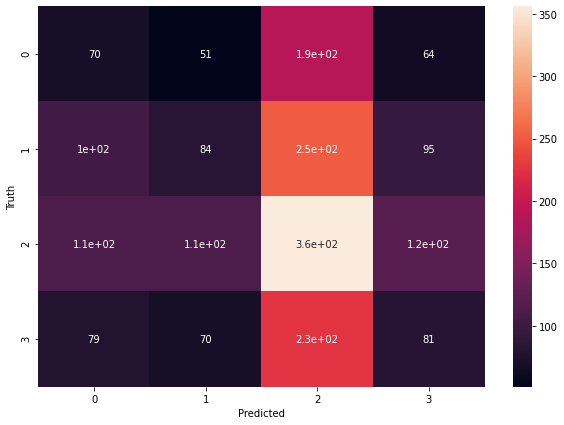

In [240]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')